# Problem Statement 1
### Feedforward neural network
### Implementing Feedforward neural networks with Keras and TensorFlow for classification of hand-written MNIST dataset using below steps: 
        a. Import the necessary packages 
        b. Load the training and testing data 
        c. Define the network architecture using Keras 
        d. Train the model using SGD with 11 epochs
        e. Evaluate the network 
        f. Plot the training loss and accuracy 
#### Implementation here

### a. Import the necessary packages

In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K

import matplotlib.pyplot as plt
import numpy as np


### b. Load training and Testing data

In [2]:
((X_train, Y_train),(x_test, y_test))=mnist.load_data()
# X_train.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
X_train=X_train.reshape((X_train.shape[0], -1))
x_test=x_test.reshape((x_test.shape[0], -1))
X_train=X_train/255.0
x_test=x_test/255.0
X_train.shape

(60000, 784)

In [4]:
lb=LabelBinarizer()

Y_train=lb.fit_transform(Y_train)
y_test=lb.transform(y_test)

### c. Defining network architecture using Keras

In [5]:
# initialise model

model=Sequential()
model.add(Dense(128, input_shape=(784,),activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

C:\Users\Pranav\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### d. Train the model using SGD with 11 epochs

In [6]:
sgd=SGD(0.01)
epochs=11
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
H=model.fit(X_train, Y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=128)

Epoch 1/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.1787 - loss: 2.3014 - val_accuracy: 0.2617 - val_loss: 2.2454
Epoch 2/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3498 - loss: 2.2331 - val_accuracy: 0.4603 - val_loss: 2.1850
Epoch 3/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4814 - loss: 2.1691 - val_accuracy: 0.5487 - val_loss: 2.1018
Epoch 4/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5453 - loss: 2.0781 - val_accuracy: 0.6181 - val_loss: 1.9808
Epoch 5/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6003 - loss: 1.9492 - val_accuracy: 0.6141 - val_loss: 1.8145
Epoch 6/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6217 - loss: 1.7747 - val_accuracy: 0.6460 - val_loss: 1.6170
Epoch 7/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6506 - loss: 1.5788 - val_accuracy: 0.6829 - val_loss: 1.4227
Epoch 8/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6860 - loss: 1.3945 - val_accuracy: 0.

### e. Evaluate Network

In [7]:
predictions = model.predict(x_test, batch_size=128)
print(classification_report(y_test.argmax(axis=1),predictions.argmax(axis=1),target_names=[str(x) for x in lb.classes_]))

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       980
           1       0.80      0.98      0.88      1135
           2       0.85      0.76      0.80      1032
           3       0.69      0.81      0.75      1010
           4       0.69      0.81      0.74       982
           5       0.80      0.55      0.65       892
           6       0.85      0.87      0.86       958
           7       0.74      0.87      0.80      1028
           8       0.78      0.59      0.67       974
           9       0.71      0.48      0.57      1009

    accuracy                           0.77     10000
   macro avg       0.78      0.77      0.76     10000
weighted avg       0.78      0.77      0.77     10000



### f. Plot training loss and accuracy

[]

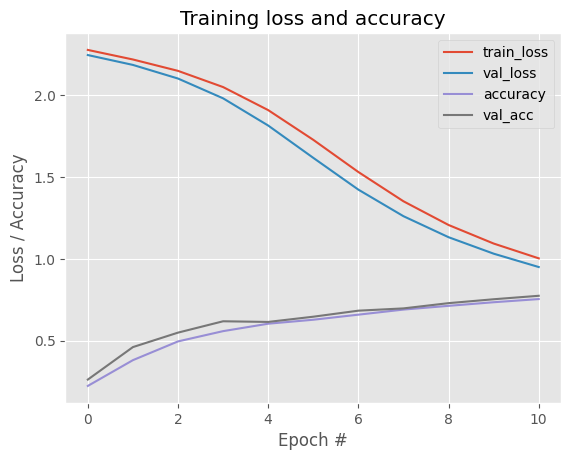

In [8]:
plt.style.use("ggplot")
plt.figure()

plt.plot(np.arange(0,epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0,epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,epochs), H.history["accuracy"], label="accuracy")
plt.plot(np.arange(0,epochs), H.history["val_accuracy"], label="val_acc")

plt.title("Training loss and accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss / Accuracy")
plt.legend()
plt.plot()

In [3]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
